In [1]:
from importlib import reload
import visa_helper as vs
import time
import joblib
from pylab import *
reload(vs)


<module 'visa_helper' from 'C:\\Users\\mathusla\\Documents\\MATHUSLA\\JupyterNotebooks\\Keysight\\visa_helper.py'>

In [2]:
# funcgen = vs.connect() # set 30 second
funcgen = vs.connect("USB0::0x0957::0x4108::MY60410882::0::INSTR") # set 30 second

[0]: TCPIP0::192.168.137.165::inst0::INSTR cannot be opened
[1]: USB0::0x0957::0x17BC::MY60101365::0::INSTR cannot be opened
[2]: USB0::0x0957::0x4108::MY60410882::0::INSTR  Agilent Technologies,81160A,MY60410882,2.0.0.0-2.6



Type number to connect: 2


Connected to VISA [USB0::0x0957::0x4108::MY60410882::0::INSTR]:  Agilent Technologies,81160A,MY60410882,2.0.0.0-2.6



In [5]:
vs.disconnect(funcgen)

In [175]:
def pulse_2pole(t_rise_ns, t_fall_ns, samples_per_ns, total_samples=8000, pre_trig_samples=0):
    total_time = total_samples/samples_per_ns
    x = np.linspace(0,total_time, total_samples)
    x0 = pre_trig_samples/samples_per_ns
    dx=(x-x0)
    dx*=np.heaviside(dx,1)
    kernel = (np.exp(-dx/t_fall_ns)-np.exp(-dx/t_rise_ns))/np.heaviside(dx,1)
    kernel_normed = kernel/max(kernel)#(np.dot(kernel,kernel/max(kernel)))
    
    return kernel_normed

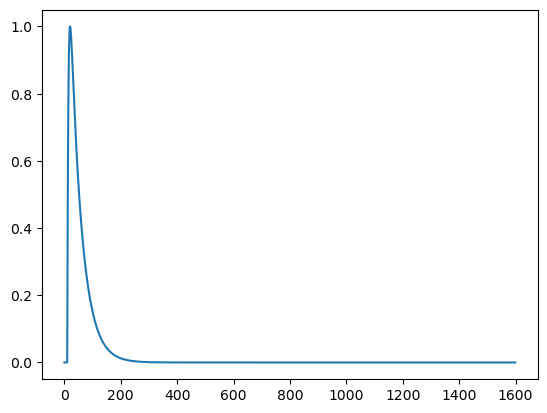

In [202]:
# waveform = pulse_2pole(3,20,samples_per_ns = 1, total_samples = waveform_length, pre_trig_samples=0)
plot(waveform)

In [203]:
waveform_length = 16000
waveform = pulse_2pole(2,20,samples_per_ns = 2, total_samples = waveform_length, pre_trig_samples=10)


SCPIcmd = ":DATA1 VOLATILE, "
strData = ""
for i in waveform:
    strData+=f"{i:.7f},"
strData=strData[:-1]   
SCPIcmd = SCPIcmd + strData

In [204]:
# # Download data points to volatile memory #

my_instrument.write("*RST"); # Reset the function generator
my_instrument.clear();   # Clear the buffer
time.sleep(1)


my_instrument.write(SCPIcmd);


# # Set up arbitrary waveform and output #
my_instrument.write(":DATA1:COPY PULSE, VOLATILE");    # Copy arb to non-volatile memory
my_instrument.write(":FUNCtion1:USER PULSE");         # Select the active arb waveform
my_instrument.write(":FUNCtion1:SHAPe USER");         # Output the selected arb waveform
# Interpolation ON
my_instrument.write(":DIG:TRAN:INT")

my_instrument.write(":OUTPut1 OFF");                    # Disable output
my_instrument.write(":OUTPut1:LOAD 50");               # Output termination is 50 Ohms

# Set the frequency to 125kHz so that 1 sample = 1ns. 122070 = 2Ghz/16384
my_instrument.write(":FREQuency1 122070;VOLTage 0.05");  
my_instrument.write(":OUTPut1 ON");                    # Enable output

time.sleep(1)

# # # Trigger: set to internal perodic trigger
# my_instrument.write(":ARM:SOUR1 INT2")
# my_instrument.write(":ARM:FREQ1 100")

In [206]:
my_instrument.write(":FREQuency1 122070;VOLTage 0.1");  


In [187]:
my_instrument.write(":DIG:TRAN:INT")


15

In [186]:
my_instrument.write(":FREQuency1 2000;VOLTage 5");  


In [182]:
my_instrument.write(":ARM:SOUR1 INT2")
my_instrument.write(":ARM:FREQ1 100")

16

In [207]:
my_instrument.close()
rm.close()

In [208]:
rm.list_opened_resources()

[]

In [174]:
my_instrument.write(":DISP ON")
# my_instrument.write(":DISP OFF")
my_instrument.write("*RST"); # Reset the function generator
my_instrument.clear();   # Clear the buffer